In [ ]:
pip install mpu
import mpu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from lightgbm import LGBMRegressor
import xgboost as xgb
import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
import mpu

In [ ]:
ss=pd.read_csv('/content/drive/MyDrive/hacker_earth/amazon_hiring/sa_sub.csv')
train = pd.read_csv('/content/drive/MyDrive/hacker_earth/amazon_hiring/train_or.csv' )
test = pd.read_csv('/content/drive/MyDrive/hacker_earth/amazon_hiring/test_or.csv')

In [ ]:
ss.head()

,ID,Time_taken (min)
0,0x7faf,25.0
1,0x4607,24.0
2,0xb379,33.0
3,0x7804,19.0
4,0x20f7,42.0


In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,9:45,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,19:20,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,23:30,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,21:50,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,17:40,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0


In [ ]:
train.nunique()

In [ ]:
train['Time_Orderd']=train['Time_Orderd'].fillna('03:00')

In [ ]:
train['Order_Date'] = pd.to_datetime(train['Order_Date'])

In [ ]:
b=[]
for i in train["Time_Orderd"]:
  i=str(i)
  t=i.split(":")
  b.append(t)

In [ ]:
c=[]
for i in train["Time_Order_picked"]:
  i=str(i)
  t=i.split(":")
  c.append(t)

In [ ]:
train[['Time_Order_picked','Time_Orderd']]

,Time_Order_picked,Time_Orderd
0,9:45,9:40
1,19:20,19:10
2,23:30,NaN
3,21:50,21:45
4,17:40,17:35
...,...,...
45588,10:35,10:30
45589,21:15,20:60
45590,8:20,8:10
45591,17:55,17:40


In [ ]:
c

In [ ]:
ho=[]
mi=[]

In [ ]:
for i in b:
  if len(i)>1:
    h=int(i[0])
    ho.append(h)
    m=int(i[1])
    mi.append(m)
  else:
    ho.append(00)  
    mi.append(00) 

  

In [ ]:
for i in c:
  print(i)

In [ ]:
c

[['9', '45'],
 ['19', '20'],
 ['23', '30'],
 ['21', '50'],
 ['17', '40'],
 ['9', '15'],
 ['22', '55'],
 ['21', '40'],
 ['16', '45'],
 ['18', '45'],
 ['11', '10'],
 ['22', '50'],
 ['21', '40'],
 ['15', '40'],
 ['17', '30'],
 ['24', '05'],
 ['22', '60'],
 ['19', '45'],
 ['17', '45'],
 ['11', '50'],
 ['9', '50'],
 ['14', '05'],
 ['18', '20'],
 ['11', '10'],
 ['24', '15'],
 ['21', '60'],
 ['19', '55'],
 ['20', '35'],
 ['10', '50'],
 ['22', '40'],
 ['20', '60'],
 ['18', '25'],
 ['17', '25'],
 ['23', '55'],
 ['16', '50'],
 ['23', '35'],
 ['21', '55'],
 ['17', '25'],
 ['8', '20'],
 ['22', '60'],
 ['18', '30'],
 ['17', '40'],
 ['17', '60'],
 ['22', '35'],
 ['23', '35'],
 ['17', '55'],
 ['21', '30'],
 ['22', '40'],
 ['15', '35'],
 ['11', '45'],
 ['21', '05'],
 ['17', '45'],
 ['10', '05'],
 ['24', '05'],
 ['19', '50'],
 ['10', '10'],
 ['24', '10'],
 ['11', '60'],
 ['10', '60'],
 ['22', '45'],
 ['8', '60'],
 ['20', '45'],
 ['20', '15'],
 ['18', '55'],
 ['17', '40'],
 ['23', '45'],
 ['20', '60'],


In [ ]:
for i in c:
  if len(i)>1:
    h=int(i[0])
    ho.append(h)
    m=int(i[1])
    mi.append(m)
  else:
    ho.append(00)  
    mi.append(00)

In [ ]:
ho=[]
mi=[]

In [ ]:
m=[]
for i in c:
  if len(i)>1:
    m=int(i[1])
    h=int(i[0])
    if m==60:
      ho.append(h+1)
      mi.append(0)
    else:  
      ho.append(h)
      mi.append(m)
  else:
    ho.append(99)  
    mi.append(99) 

In [ ]:
m=[]
for i in b:
  if len(i)>1:
    m=int(i[1])
    h=int(i[0])
    if m==60:
      ho.append(h+1)
      mi.append(0)
    else:  
      ho.append(h)
      mi.append(m)
  else:
    ho.append(99)  
    mi.append(99) 

In [ ]:
ho

In [ ]:
train["orderd_hour"] = ho
train['orderd_minute'] = mi

In [ ]:
len(ho)

91186

In [ ]:
train["picked_hour"] = ho
train['picked_minute'] = mi

In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,orderd_hour,orderd_minute,picked_hour,picked_minute
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,Drinks,motorcycle,1.0,No,Metropolitian,19.0,9,40,9,45
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,Buffet,motorcycle,3.0,No,Metropolitian,43.0,19,10,19,20
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,...,Buffet,electric_scooter,1.0,No,Metropolitian,21.0,99,99,23,30
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,Meal,motorcycle,2.0,No,Semi-Urban,46.0,21,45,21,50
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,Snack,electric_scooter,1.0,No,Metropolitian,32.0,17,35,17,40


In [ ]:
train[train['orderd_hour']!=train['picked_hour']]

In [ ]:
train['orderd_hour']=np.where()

In [ ]:
train['p_time']=(train['picked_hour']*60+train['picked_minute'])-(train['orderd_hour']*60+train['orderd_minute'])

In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,multiple_deliveries,Festival,City,Time_taken,orderd_hour,orderd_minute,picked_hour,picked_minute,p_time,orderd_hour_u
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,1.0,No,Metropolitian,19.0,9,40,9,45,5,9
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,3.0,No,Metropolitian,43.0,19,10,19,20,10,19
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,...,1.0,No,Metropolitian,21.0,99,99,23,30,10,23
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,2.0,No,Semi-Urban,46.0,21,45,21,50,5,21
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,1.0,No,Metropolitian,32.0,17,35,17,40,5,17


In [ ]:
train[train.orderd_hour==99]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_taken,orderd_hour,orderd_minute,picked_hour,picked_minute,p_time,orderd_hour_u,orderd_minute_u,orderd_hour_new,orderd_minute_new
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,...,21.0,99,99,23,30,10,23,20,23,20
20,0x1069,MYSRES20DEL01,NaN,NaN,12.337978,76.616792,12.347978,76.626792,13-03-2022,NaN,...,18.0,99,99,9,50,10,9,40,9,40
21,0x50b,MUMRES03DEL01,NaN,NaN,-19.223840,-72.841347,19.263840,72.881347,05-03-2022,NaN,...,34.0,99,99,14,5,10,99,99,13,55
36,0x2333,MUMRES05DEL02,NaN,NaN,18.927584,72.832585,18.977584,72.882585,07-03-2022,NaN,...,25.0,99,99,21,55,10,21,45,21,45
68,0x4ec,RANCHIRES02DEL02,NaN,NaN,0.000000,0.000000,0.020000,0.020000,07-03-2022,NaN,...,12.0,99,99,8,45,10,8,35,8,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45545,0x93c,PUNERES08DEL01,NaN,NaN,18.534080,73.898520,18.604080,73.968520,02-04-2022,NaN,...,49.0,99,99,19,35,10,19,25,19,25
45565,0x473,MYSRES07DEL03,NaN,NaN,-12.325461,-76.632278,12.385461,76.692278,03-03-2022,NaN,...,16.0,99,99,22,45,10,22,35,22,35
45570,0x232f,INDORES06DEL02,NaN,NaN,22.728163,75.884212,22.858163,76.014212,14-03-2022,NaN,...,37.0,99,99,18,0,10,99,99,17,55
45576,0xde6,JAPRES010DEL03,NaN,NaN,26.921411,75.793604,27.011411,75.883604,31-03-2022,NaN,...,17.0,99,99,24,0,10,99,99,23,55


In [ ]:
new=train.copy()

In [ ]:
(5+10+15)/3

In [ ]:
train.p_time.value_counts()

In [ ]:
train['p_time']=np.where(train['p_time']<0,10,train['p_time'])

In [ ]:
train['orderd_hour_u']=np.where((train.orderd_hour==99) &(train.picked_minute>9),train.picked_hour,train.orderd_hour)

In [ ]:
train['orderd_minute_u']=np.where(train.orderd_hour_u!=99,(train.picked_minute-10),train.orderd_minute)

In [ ]:
train['orderd_hour_new']=np.where(train.orderd_hour_u==99,(train.picked_hour-1),train.orderd_hour_u)

In [ ]:
train['orderd_minute_new']=np.where(train.orderd_minute_u==99,55,train.orderd_minute_u)

In [ ]:
train.nunique()

In [ ]:
test.nunique()

In [ ]:
train[train.ID=='0x4607']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
21661,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0


# eda

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weather                      44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11241 non-null  object 
 12  Road_traffic_density         11245 non-null  object 
 13  Vehicle_conditio

In [ ]:
missing = pd.DataFrame()
missing['sum'] = train.isna().sum()
missing['percentage'] = train.isna().mean() *  100
missing =  missing[missing['sum'] > 0 ].sort_values(ascending = False, by ='sum')
missing

,sum,percentage
Delivery_person_Ratings,1908,4.184853
Delivery_person_Age,1854,4.066414
Time_Orderd,1731,3.796635
City,1200,2.631983
multiple_deliveries,993,2.177966
Weather,616,1.351085
Road_traffic_density,601,1.318185
Festival,228,0.500077


In [ ]:
missing = pd.DataFrame()
missing['sum'] = test.isna().sum()
missing['percentage'] = test.isna().mean() *  100
missing =  missing[missing['sum'] > 0 ].sort_values(ascending = False, by ='sum')
missing

,sum,percentage
Delivery_person_Ratings,507,4.447759
Delivery_person_Age,491,4.307395
Time_Orderd,444,3.895079
City,324,2.842355
multiple_deliveries,238,2.087902
Weather,158,1.386086
Road_traffic_density,154,1.350996
Festival,65,0.570225


45 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


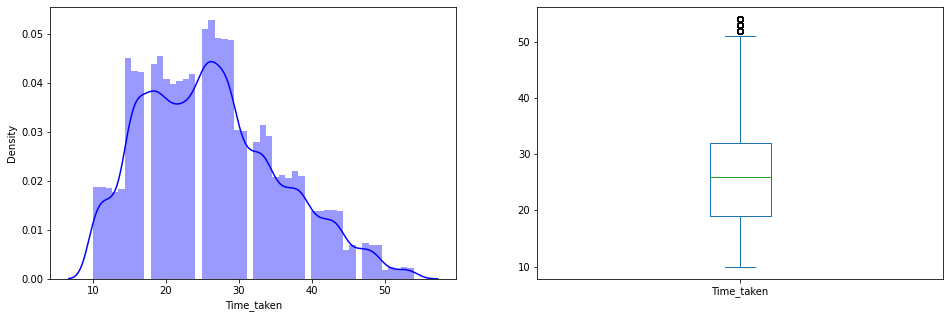

In [ ]:
print(train["Time_taken"].nunique(),"\n")
plt.subplot(121)
sns.distplot(train['Time_taken'],color="b");

plt.subplot(122)
train['Time_taken'].plot.box(figsize=(16,5))

plt.show()

2259 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


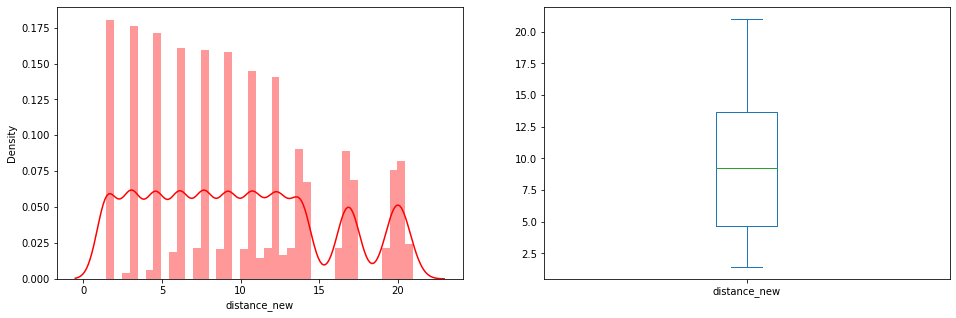

In [ ]:
print(train["distance_new"].nunique(),"\n")
plt.subplot(121)
sns.distplot(train['distance_new'],color="r");

plt.subplot(122)
train['distance_new'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
train.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken,distance,distance_new
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000,45593.000000,45593.000000,45593.000000
mean,29.567137,4.633780,17.401571,70.782088,17.465186,70.845702,1.023359,0.744664,26.294607,607.314326,9.735394
std,5.815155,0.334716,7.333766,21.118611,7.335122,21.118812,0.839065,0.572473,9.383806,1249.421003,5.608507
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,10.000000,63.729608,1.465067
25%,25.000000,4.500000,12.934179,73.170283,12.988453,73.280000,0.000000,0.000000,19.000000,259.418189,4.663345
50%,30.000000,4.700000,18.554382,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000,464.121724,9.220148
75%,35.000000,4.900000,22.732225,78.046106,22.785049,78.107044,2.000000,1.000000,32.000000,710.617130,13.681492
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,19957.594884,20.969489


In [ ]:
train.nunique()

ID                             45593
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather                            6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken                        45
dtype: int64

In [ ]:
train.City.unique()

array(['Metropolitian', 'Semi-Urban', nan, 'Urban'], dtype=object)

In [ ]:
test.nunique()

ID                             11399
Delivery_person_ID              1297
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              492
Restaurant_longitude             434
Delivery_location_latitude      3572
Delivery_location_longitude     3572
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather                            6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
dtype: int64

# feature eng

In [ ]:
from math import sin, cos, sqrt, atan2

R = 6373.0

def distance_cal(lat1,lon1,lat2,lon2):


  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
  c = 2 * atan2(sqrt(a), sqrt(1-a))
  distance = R * c
  return distance


In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,9:45,Sunny,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,19:20,Stormy,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0
2,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,03-04-2022,NaN,23:30,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,21:50,Cloudy,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,17:40,Windy,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0


In [ ]:
train['Restaurant_latitude']=abs(train['Restaurant_latitude'])
train['Restaurant_longitude']=abs(train['Restaurant_longitude'])

In [ ]:
train['distance'] = train.apply(lambda row : distance_cal(row['Delivery_location_latitude'],
                                  row['Delivery_location_longitude'],row['Restaurant_latitude'],row['Restaurant_longitude']), axis = 1)

In [ ]:
pip install mpu

In [ ]:
train['distance_new'] = train.apply(lambda row : mpu.haversine_distance((row['Delivery_location_latitude'],
                                  row['Delivery_location_longitude']),(row['Restaurant_latitude'],row['Restaurant_longitude'])), axis = 1)

In [ ]:
train[train.distance_new>19]

In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance,distance_new
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.0,127.553023,3.116127
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,43.0,630.636976,11.007735
2,0x463,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.371358,73.224798,03-04-2022,NaN,...,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,21.0,524.555718,9.087980
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,Jam,1,Meal,motorcycle,2.0,No,Semi-Urban,46.0,707.522012,16.600954
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,32.0,842.452926,19.976746


In [ ]:
train[train.Time_taken>40]

In [ ]:
train.distance_new=train.distance_new.round(4)

In [ ]:
train.distance_new.value_counts()

20.4429    341
3.1451     337
14.1528    336
9.4352     336
6.2901     335
          ... 
8.8109       1
7.5503       1
20.5567      1
13.7357      1
19.6743      1
Name: distance_new, Length: 2259, dtype: int64

In [ ]:
train.distance_new.values

array([ 3.12, 11.01,  9.09, ...,  1.51, 10.43, 12.12])

In [ ]:
train.distance_new=train.distance_new.round(2)

In [ ]:
train[train.distance_new==20.4429]

In [ ]:
train['speed']=(train['distance_new']/train['Time_taken'])

In [ ]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance,distance_new,time_per_kl,speed
0,0x1c92,COIMBRES03DEL02,39.0,5.0,11.025083,77.015393,11.045083,77.035393,01-04-2022,9:40,...,Drinks,motorcycle,1.0,No,Metropolitian,19.0,127.553023,3.1161,0.164005,0.164005
1,0xaaab,VADRES07DEL01,36.0,4.7,0.000000,0.000000,0.070000,0.070000,04-03-2022,19:10,...,Buffet,motorcycle,3.0,No,Metropolitian,43.0,630.636976,11.0077,0.255993,0.255993
2,0x463,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.371358,73.224798,03-04-2022,NaN,...,Buffet,electric_scooter,1.0,No,Metropolitian,21.0,524.555718,9.0880,0.432762,0.432762
3,0xacec,RANCHIRES07DEL01,37.0,4.2,23.359407,85.325055,23.469407,85.435055,02-04-2022,21:45,...,Meal,motorcycle,2.0,No,Semi-Urban,46.0,707.522012,16.6010,0.360891,0.360891
4,0xb9cc,HYDRES01DEL02,38.0,3.7,17.410371,78.437225,17.540371,78.567225,04-04-2022,17:35,...,Snack,electric_scooter,1.0,No,Metropolitian,32.0,842.452926,19.9767,0.624272,0.624272
